In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda0: GeForce GTX 750 Ti (0000:01:00.0)


In [2]:
topics_filename = 'd2v_data400_all.csv'
train_filename = 'train.csv'
data_ncol = 800

In [3]:
df = pd.read_csv(topics_filename, header=None)
df = df.drop(data_ncol,1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.072163,0.060994,-0.060077,0.000438,0.054600,-0.068482,0.020702,0.034300,0.008242,-0.051708,...,0.091707,0.001498,-0.044733,-0.093374,-0.013810,0.083127,-0.020736,-0.072076,-0.092594,0.008562
1,-0.013711,0.081569,-0.006696,0.069358,0.026890,0.010380,0.095092,-0.069199,0.003786,-0.150233,...,0.048036,-0.176398,0.030791,0.126536,0.033324,0.026661,-0.020800,0.110884,-0.019262,-0.044875
2,-0.006468,0.022704,0.027048,0.074742,0.001341,0.039331,0.050175,0.012688,0.024875,-0.075464,...,-0.026693,-0.036071,0.007463,-0.017375,-0.043044,-0.110314,0.094794,0.008277,0.132516,-0.170688
3,-0.040340,0.066890,0.058090,0.052185,-0.000513,0.049394,0.053433,0.003963,-0.099440,0.094708,...,-0.038896,0.027954,0.001171,0.018278,-0.041046,0.040190,-0.052540,0.010724,-0.000801,0.067479
4,0.040899,0.066088,0.072599,0.003159,0.085027,0.004759,-0.018571,-0.027149,0.074114,-0.091746,...,0.113324,0.009450,-0.055692,-0.070541,0.038164,0.140721,-0.034714,-0.027455,-0.042295,0.057596


In [4]:
df.shape

(404290, 800)

In [5]:
df_text = pd.read_csv(train_filename).fillna("")
df_text.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
print df_text.shape
print df.shape

(404290, 6)
(404290, 800)


In [7]:
X = df.values
y = df_text.iloc[:,-1:].values.ravel()
del df_text

In [8]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed) 

In [9]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint 

In [10]:
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
  # create model
    model = Sequential()
    model.add(Dense(800, input_dim=800, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(800, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], y[train], epochs=10, batch_size=10000, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 75.79%
acc: 75.28%
acc: 75.19%
acc: 74.75%
acc: 74.23%
acc: 74.87%
acc: 74.71%
acc: 75.34%
acc: 75.29%
acc: 75.20%
75.07% (+/- 0.41%)


In [48]:
#create model
model = Sequential()
model.add(Dense(800, input_dim=800, kernel_initializer='uniform', activation='relu'))
model.add(Dense(800, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint 
filepath='weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc' , verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, callbacks=callbacks_list, batch_size=10000)

Train on 270874 samples, validate on 133416 samples
Epoch 1/20
270874/270874 [==============================] - 7s - loss: 0.5895 - acc: 0.6403 - val_loss: 0.5618 - val_acc: 0.7097
Epoch 2/20
270874/270874 [==============================] - 6s - loss: 0.5463 - acc: 0.7217 - val_loss: 0.5399 - val_acc: 0.7224
Epoch 3/20
270874/270874 [==============================] - 4s - loss: 0.5261 - acc: 0.7294 - val_loss: 0.5228 - val_acc: 0.7359
Epoch 4/20
270874/270874 [==============================] - 4s - loss: 0.5068 - acc: 0.7435 - val_loss: 0.5132 - val_acc: 0.7425
Epoch 5/20
270874/270874 [==============================] - 3s - loss: 0.4911 - acc: 0.7523 - val_loss: 0.5234 - val_acc: 0.7392
Epoch 6/20
270874/270874 [==============================] - 4s - loss: 0.4756 - acc: 0.7623 - val_loss: 0.5100 - val_acc: 0.7486
Epoch 7/20
270874/270874 [==============================] - 3s - loss: 0.4576 - acc: 0.7737 - val_loss: 0.5171 - val_acc: 0.7386
Epoch 8/20
270874/270874 [===================

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

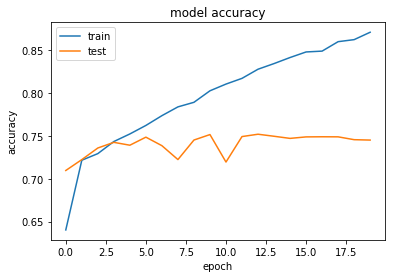

In [49]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

132800/133416 [============================>.] - ETA: 0s 

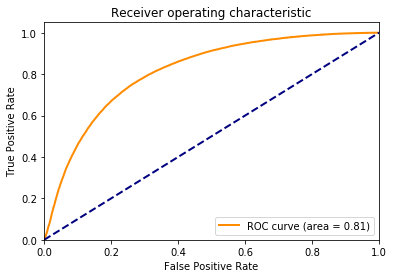

In [50]:
# load weights
model.load_weights("weights.best.hdf5")
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

269248/270874 [============================>.] - ETA: 0s  

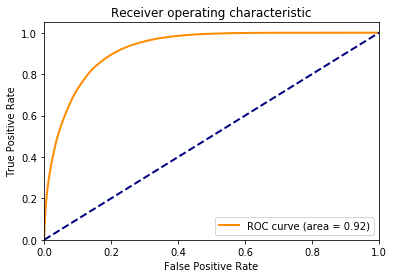

In [60]:
# load weights
model.load_weights("weights.best.hdf5")
y_pred_prob = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [12]:
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dropout

In [20]:
#create model
model = Sequential()
model.add(Dropout(0.2, input_shape=(800,)))
model.add(Dense(800, input_dim=800, kernel_initializer='uniform', 
                activation='relu',  kernel_constraint=maxnorm(2.)))
model.add(Dropout(0.2))
model.add(Dense(800, kernel_initializer='uniform', activation='relu',
                kernel_constraint=maxnorm(2.)))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#sgd = SGD(lr=1.0, momentum=0.9, decay=0.001, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# checkpoint 
filepath='weights_do.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc' , verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test), batch_size=10000, callbacks=callbacks_list)

Train on 270874 samples, validate on 133416 samples
Epoch 1/20
270874/270874 [==============================] - 4s - loss: 0.5940 - acc: 0.6362 - val_loss: 0.5670 - val_acc: 0.7134
Epoch 2/20
270874/270874 [==============================] - 3s - loss: 0.5579 - acc: 0.7084 - val_loss: 0.5484 - val_acc: 0.7104
Epoch 3/20
270874/270874 [==============================] - 4s - loss: 0.5400 - acc: 0.7205 - val_loss: 0.5408 - val_acc: 0.7156
Epoch 4/20
270874/270874 [==============================] - 4s - loss: 0.5264 - acc: 0.7299 - val_loss: 0.5345 - val_acc: 0.7206
Epoch 5/20
270874/270874 [==============================] - 3s - loss: 0.5134 - acc: 0.7389 - val_loss: 0.5380 - val_acc: 0.7169
Epoch 6/20
270874/270874 [==============================] - 4s - loss: 0.5035 - acc: 0.7450 - val_loss: 0.5108 - val_acc: 0.7397
Epoch 7/20
270874/270874 [==============================] - 3s - loss: 0.4965 - acc: 0.7486 - val_loss: 0.5324 - val_acc: 0.7207
Epoch 8/20
270874/270874 [===================

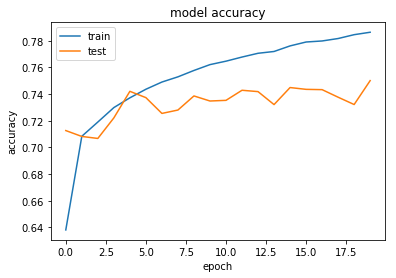

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

133184/133416 [============================>.] - ETA: 0s 

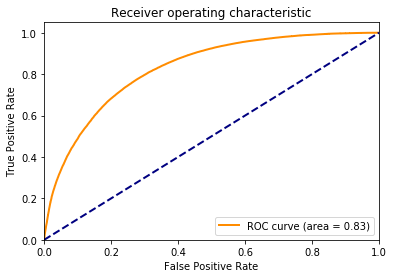

In [58]:
# load weights
model.load_weights("weights_do.best.hdf5")
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

270176/270874 [============================>.] - ETA: 0s 

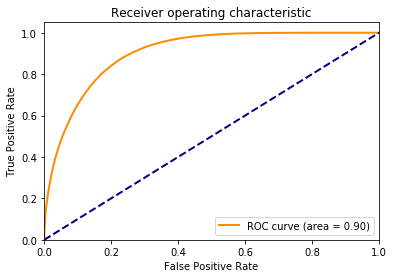

In [59]:
y_pred_prob = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(800,)))
model.add(Dense(800, input_dim=800, kernel_initializer='uniform', 
                activation='relu',  kernel_constraint=maxnorm(2.)))
model.add(Dropout(0.2))
model.add(Dense(800, kernel_initializer='uniform', activation='relu',
                kernel_constraint=maxnorm(2.)))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#model.load_weights("weights_do.best.hdf5")
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [25]:
model.load_weights("weights_do.best.hdf5")
y_pred_prob = model.predict_proba(X_test)

133056/133416 [============================>.] - ETA: 0s

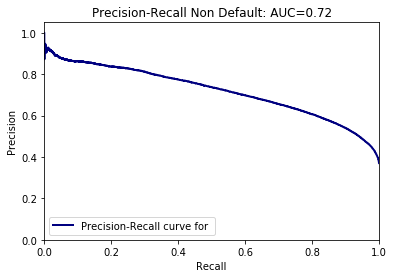

In [28]:
precision = dict()
recall = dict()
average_precision = dict()
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision, lw=2, color='navy',
         label='Precision-Recall curve for ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Non Default: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test).ravel()

132128/133416 [============================>.] - ETA: 0s

In [54]:
print confusion_matrix(y_test, y_pred)

[[62864 21342]
 [12353 36857]]
